**Student Perfomance Indicatorr**

PROBLEM STATEMENT

This project understands how the student's perfomance (test scores) is affected by other variables such as Gende, Elthnicity,Parental level of education, Lunch and Test preparation score.

DATA : 8 columns and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Importing the CSV Data

In [2]:
df=pd.read_csv('data/stud.csv')

In [7]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

CHECK 1: Missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

CHECK 2: duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

CHECK 3: data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


CHECK 4: number of unique values in each columns

In [17]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Adding columns for "Total Score" and "Average"

In [26]:
df["Total_Score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]=(df["Total_Score"]/3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [28]:
reading_full_marks=df[df['reading_score']==100]['Average'].count()
writing_full_marks=df[df['writing_score']==100]['Average'].count()
math_full_marks=df[df['math_score']==100]['Average'].count()

print(f'Number of students with full marks in Reading: {reading_full_marks}')
print(f'Number of students with full marks in Writing: {writing_full_marks}')
print(f'Number of students with full marks in Math: {math_full_marks}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [29]:
reading_less_20=df[df['reading_score']<20]['Average'].count()
writing_less_20=df[df['writing_score']<20]['Average'].count()
math_less_20=df[df['math_score']<20]['Average'].count()
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Math: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


EDA

Histogram and KDE

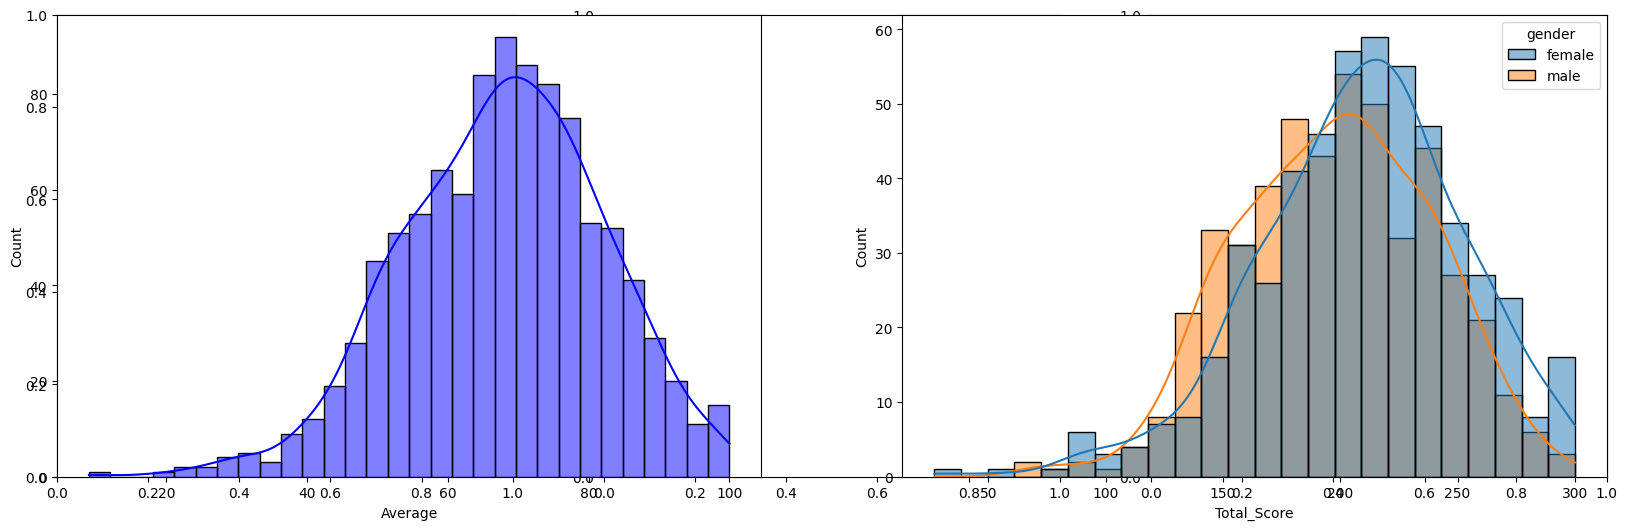

In [32]:
fig,axs=plt.subplots(1,3,figsize=(20,6))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()

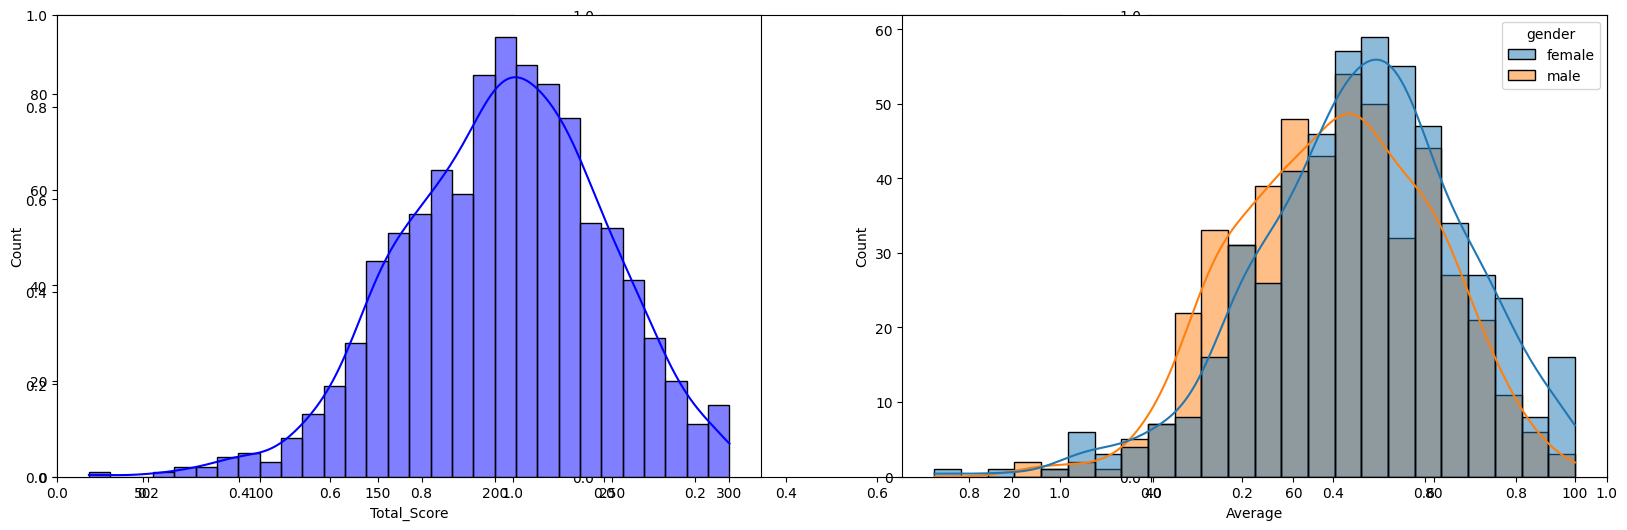

In [33]:
fig,axs=plt.subplots(1,3,figsize=(20,6))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()